# Counting paths from root to leaf in a CCT

October 2024

## Preamble

In [1]:
# General importations.
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import platform
import time
import warnings
import math

import networkx as nx

# View versioning.
print("python version     :", platform.python_version())
print("numpy version      :", np.__version__)
print("pandas version     :", pd.__version__)
print("matplotlib version :", matplotlib.__version__)
print("seaborn version    :", sns.__version__)

python version     : 3.10.13
numpy version      : 1.26.3
pandas version     : 2.1.4
matplotlib version : 3.8.0
seaborn version    : 0.12.2


## Define functions

In [3]:
def get_total_paths_cct(n: int) -> int:

    '''
    n = total nodes in CCT
    '''

    return 2**(n-2)

In [4]:
def get_cct(n_cutpoints: int = 1,
            plot: bool = True) -> nx.classes.graph.Graph:

    '''
    Generates the commutative cut tree associated with a given number of cutpoints.
    '''

    adj_cct = np.triu(np.ones((n_cutpoints+2,n_cutpoints+2)), k = 1)
    cct = nx.from_numpy_array(adj_cct, create_using = nx.DiGraph)
    return cct

# CCTs

In [5]:
graphs = []
smallest = 1
largest = 10
for n in range(smallest,largest):
    G = get_cct(n)
    graphs.append(G)

    # Print total nodes.
    print("Total nodes:", len(G))
    
    # Print total edges.
    print("Total edges:", G.size())
    print()

Total nodes: 3
Total edges: 3

Total nodes: 4
Total edges: 6

Total nodes: 5
Total edges: 10

Total nodes: 6
Total edges: 15

Total nodes: 7
Total edges: 21

Total nodes: 8
Total edges: 28

Total nodes: 9
Total edges: 36

Total nodes: 10
Total edges: 45

Total nodes: 11
Total edges: 55



In [6]:
path_lengths = []
for graph in graphs:
    print("Total nodes     :", len(graph))
    print("Total cutpoints :", len(graph)-2)
    print("Total edges     :", graph.size())
    leaf = list(graph.nodes())[-1]
    root = list(graph.nodes())[0]
    paths = nx.all_simple_paths(graph, root, leaf)
    total_paths = len(list(paths))
    path_lengths.append(total_paths)
    print("Total paths     :", total_paths)
    print("Per forumala    :", get_total_paths_cct(len(graph)))
    print()

Total nodes     : 3
Total cutpoints : 1
Total edges     : 3
Total paths     : 2
Per forumala    : 2

Total nodes     : 4
Total cutpoints : 2
Total edges     : 6
Total paths     : 4
Per forumala    : 4

Total nodes     : 5
Total cutpoints : 3
Total edges     : 10
Total paths     : 8
Per forumala    : 8

Total nodes     : 6
Total cutpoints : 4
Total edges     : 15
Total paths     : 16
Per forumala    : 16

Total nodes     : 7
Total cutpoints : 5
Total edges     : 21
Total paths     : 32
Per forumala    : 32

Total nodes     : 8
Total cutpoints : 6
Total edges     : 28
Total paths     : 64
Per forumala    : 64

Total nodes     : 9
Total cutpoints : 7
Total edges     : 36
Total paths     : 128
Per forumala    : 128

Total nodes     : 10
Total cutpoints : 8
Total edges     : 45
Total paths     : 256
Per forumala    : 256

Total nodes     : 11
Total cutpoints : 9
Total edges     : 55
Total paths     : 512
Per forumala    : 512



## Plot growth curve

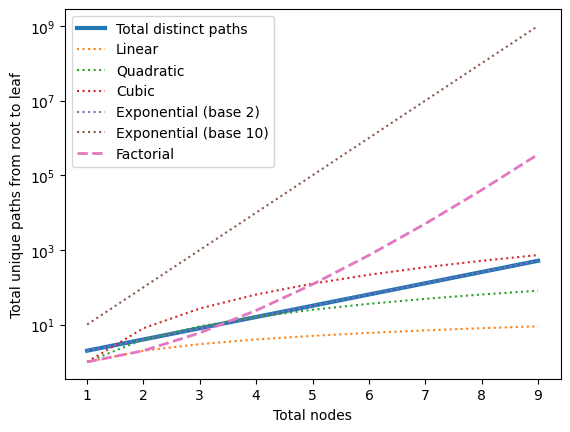

In [8]:
node_counts = range(smallest,largest)

plt.plot(node_counts, path_lengths, label = "Total distinct paths", linewidth = 3)
#plt.ylim((1,max(path_lengths)))
plt.yscale("log")
plt.plot(node_counts, [x for x in node_counts], label = "Linear", linestyle = "dotted")
plt.plot(node_counts, [x**2 for x in node_counts], label = "Quadratic", linestyle = "dotted")
plt.plot(node_counts, [x**3 for x in node_counts], label = "Cubic", linestyle = "dotted")
#plt.plot(node_counts, [np.log(x) for x in node_counts], label = "Log (base 2)", linestyle = "dotted")
plt.plot(node_counts, [2**x for x in node_counts], label = "Exponential (base 2)", linestyle = "dotted")
plt.plot(node_counts, [10**x for x in node_counts], label = "Exponential (base 10)", linestyle = "dotted")
plt.plot(node_counts, [math.factorial(x) for x in node_counts], label = "Factorial", linestyle = "dashed", linewidth = 2)
plt.legend(loc = "upper left")
plt.xlabel("Total nodes")
plt.ylabel("Total unique paths from root to leaf")
plt.show()
plt.close()

In [ ]:
'''
node_counts = range(smallest,largest)
cutpoint_counts = [x-2 for x in node_counts]
cutpoint_counts = cutpoint_counts[1:]

plt.plot(cutpoint_counts, path_lengths[1:], label = "Total distinct paths", linewidth = 3)
#plt.ylim((1,max(path_lengths)))
plt.yscale("log")
plt.plot(cutpoint_counts, [x for x in cutpoint_counts], label = "Linear", linestyle = "dotted")
plt.plot(cutpoint_counts, [x**2 for x in cutpoint_counts], label = "Quadratic", linestyle = "dotted")
plt.plot(cutpoint_counts, [x**3 for x in cutpoint_counts], label = "Cubic", linestyle = "dotted")
#plt.plot(cutpoint_counts, [np.log(x) for x in cutpoint_counts], label = "Log (base 2)", linestyle = "dotted")
plt.plot(cutpoint_counts, [2**x for x in cutpoint_counts], label = "Exponential (base 2)", linestyle = "dotted")
plt.plot(cutpoint_counts, [10**x for x in cutpoint_counts], label = "Exponential (base 10)", linestyle = "dotted")
plt.plot(cutpoint_counts, [math.factorial(x) for x in cutpoint_counts], label = "Factorial", linestyle = "dashed", linewidth = 2)
plt.legend(loc = "upper left")
plt.xlabel("Total cutpoints")
plt.ylabel("Total unique paths from root to leaf")
plt.show()
plt.close()
'''

In [9]:
#!pip freeze > requirements.txt

## End of document